In [127]:
import pickle
import pandas as pd
import numpy as np

In [128]:
#memory = pickle.load(open("funmemory.p", "rb"))
memory = pickle.load(open("beastmodememory.p", "rb"))

In [129]:
len(memory)

10820

In [130]:
objmondict = ['none','rabbit', 'raccoon']
#exitdict = ['north', 'east', 'south', 'west']
room_name_dict = ['none','Limbo', 'Love', 'Brownhaven', 'Alley', 'Pawn', 'Path', 'Petting']
#actiondict = ['none', 'north', 'east', 'south', 'west','killrabbit', 'killraccoon',  'look']
hostiledict = ['none','hrabbit','hraccoon']

actionlist= ['none', 'north', 'east', 'south', 'west', 'killrabbit', 'killraccoon', 'look']
allowed_exists={'Petting': ['south'],
                'Path': ['north','south'],
                'Brownhaven': ['east','north','south'],
                'Love':['west'],
                'Alley':['north','east'],
                'Pawn':['west']
                
               }


dictlist = room_name_dict+objmondict+hostiledict
print('world states that are 1/0: ',len(dictlist))
print('+1 hp state')



world states that are 1/0:  14
+1 hp state


In [131]:
def parse_state(state,statedictlist):
    print('hp:',state[0][0])
    s = state[0][1:].tolist()
   
    nonzeroindices=[i for i, e in enumerate(s) if e == 1.0]
    for i in nonzeroindices:
        print(dictlist[i])
       # print('allowed exists',allowed_exists[dictlist[i]])
    

In [132]:
def room_from_state(state,room_name_dict):
    s = state[0][1:9].tolist()
    nzi = [i for i,e in enumerate(s) if e == 1.0]
  
    rindex = nzi[0]
    room = room_name_dict[rindex]

    return room

In [133]:
#view all memory
rlist=[]
alist=[]
aelist=[]
rwlist=[]
allist = []
mdf = pd.DataFrame()
memorydf = pd.DataFrame()
state_list =[]
action_index=[]
reward_index=[]
state2_list=[]
for i in np.arange(len(memory)):    
    (state, actionindex, reward, state2, done)=memory[i]
    #print('------')
    #parse_state(state,dictlist)    
    try:
        room = room_from_state(state,room_name_dict)
        ae=allowed_exists[room]
    except:
        room = ''
        ae = ['']
   
    act=actionlist[actionindex]
    #print('room:',room,'allowed:',ae,'ACTION',act,'rwd',reward)
    allowed=False
    for ex in ae:
        if ex == act:
            allowed=True
    allist.append(allowed)
    rlist.append(room)
    alist.append(act)
    aelist.append(ae)
    rwlist.append(reward)
    
    state_list.append(state)
    state2_list.append(state2)
    action_index.append(actionindex)
    reward_index.append(reward)

In [134]:
memorydf['state']=state_list
memorydf['action']=action_index
memorydf['reward']=reward_index
memorydf['state2']=state2_list

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

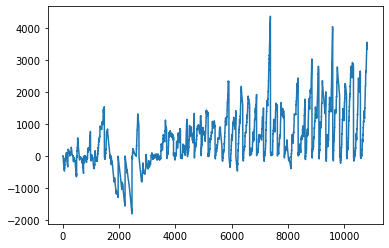

In [136]:
memorydf['reward'].plot()

In [137]:
actionlist2=['nothing','nothing', 'north', 'east', 'south', 'west', 'killrabbit', 'killraccoon', 'look']

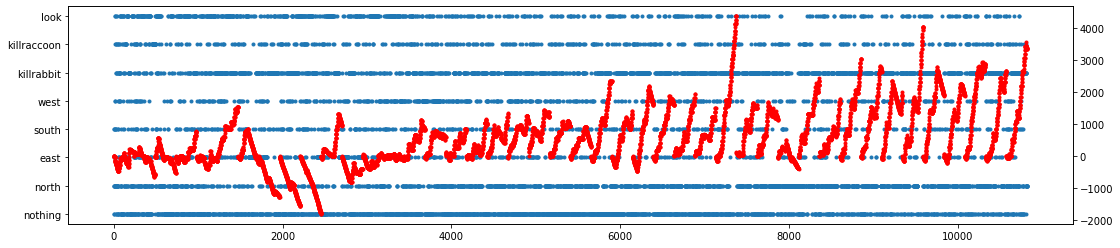

In [138]:
fig,ax = plt.subplots(figsize=(18,4))
y = memorydf['action'].values
plt.plot(y,'.')
ax.set_yticklabels(actionlist2)
ax2= ax.twinx()
ax2.plot(memorydf['reward'].values,'r.')


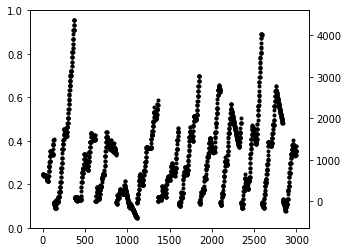

In [143]:
fig,ax = plt.subplots(figsize=(5,4))
#y = memorydf['action'].iloc[7000:10000].values
#plt.plot(y,'.')
#ax.set_yticklabels(actionlist2)
ax2= ax.twinx()
ax2.plot(memorydf['reward'].iloc[7000:10000].values,'k.')


Text(0.5, 1.0, 'episode avg')

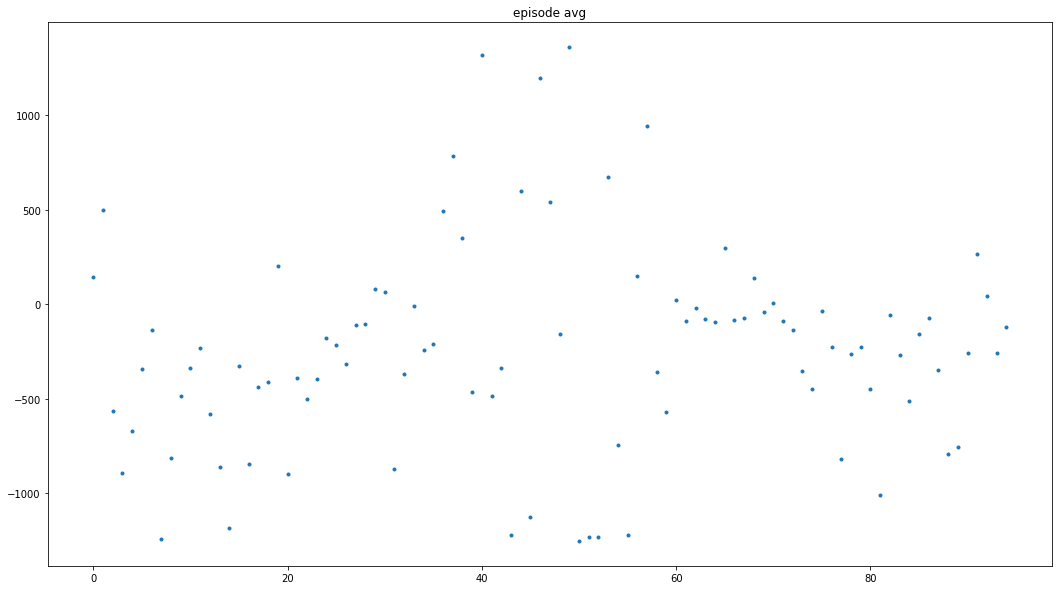

In [112]:
rwds =  np.array(memorydf['reward'].iloc[0:23750].values)
episode_avg_rewards = np.mean(rwds.reshape(-1, 250), axis=1)
fig,ax = plt.subplots(figsize=(18,10))
plt.plot(episode_avg_rewards,'.')
plt.title('episode avg')

In [113]:
memorydf

,state,action,reward,state2
0,"[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4,-10,"[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4,-15,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",5,-25,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0,-35,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",5,-40,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
23842,"[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,-500,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
23843,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0,-505,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
23844,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0,-510,"[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
23845,"[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,-520,"[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [15]:
#view all memory
rlist=[]
alist=[]
aelist=[]
rwlist=[]
allist = []
mdf = pd.DataFrame()
memorydf = pd.DataFrame()
state_list =[]
action_index=[]
reward_index=[]
state2_list=[]
for i in np.arange(len(memory)):
    
    (state, actionindex, reward, state2, done)=memory[i]
    #print('------')
    #parse_state(state,dictlist)
    
    room = room_from_state(state,room_name_dict)
    ae=allowed_exists[room]
    act=actionlist[actionindex]
    print('room:',room,'allowed:',ae,'ACTION',act,'rwd',reward)
    allowed=False
    for ex in ae:
        if ex == act:
            allowed=True
    allist.append(allowed)
    rlist.append(room)
    alist.append(act)
    aelist.append(ae)
    rwlist.append(reward)
    
    state_list.append(state)
    state2_list.append(state2)
    action_index.append(actionindex)
    reward_index.append(reward)
    
   # print('action:',actionlist[actionindex])
    #print('reward:',reward)

room: Petting allowed: ['south'] ACTION east rwd 0
room: Path allowed: ['north', 'south'] ACTION north rwd 10
room: Path allowed: ['north', 'south'] ACTION none rwd -10
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -21
room: Petting allowed: ['south'] ACTION south rwd -11
room: Petting allowed: ['south'] ACTION north rwd 20
room: Path allowed: ['north', 'south'] ACTION south rwd 0
room: Petting allowed: ['south'] ACTION north rwd 10
room: Path allowed: ['north', 'south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION south rwd 20
room: Petting allowed: ['south'] ACTION none rwd 0
room: Path allowed: ['north', 'south'] ACTION north rwd -21
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 20
room: Path allowed: ['north', 'south'] ACTION east rwd 10
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION east rwd 10
room: Love allowed: ['west'] ACTION north rwd 9.9
room: Brownhaven allowed: ['eas

room: Petting allowed: ['south'] ACTION west rwd -22
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION east rwd 0
room: Petting allowed: ['south'] ACTION south rwd -11
room: Petting allowed: ['south'] ACTION east rwd -10
room: Path allowed: ['north', 'south'] ACTION none rwd 0
room: Path allowed: ['north', 'south'] ACTION north rwd -42
room: Path allowed: ['north', 'south'] ACTION south rwd 10
room: Petting allowed: ['south'] ACTION east rwd 10
room: Path allowed: ['north', 'south'] ACTION none rwd 10
room: Path allowed: ['north', 'south'] ACTION west rwd -41
room: Path allowed: ['north', 'south'] ACTION north rwd 20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION none rwd 0
room: Petting allowed: ['south'] ACTION none rwd -42
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allo

room: Petting allowed: ['south'] ACTION none rwd -10
room: Petting allowed: ['south'] ACTION south rwd -42
room: Petting allowed: ['south'] ACTION west rwd 0
room: Path allowed: ['north', 'south'] ACTION none rwd 10
room: Path allowed: ['north', 'south'] ACTION east rwd -41
room: Path allowed: ['north', 'south'] ACTION east rwd 0
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION west rwd 0
room: Path allowed: ['north', 'south'] ACTION south rwd 10
room: Path allowed: ['north', 'south'] ACTION east rwd -20
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION east rwd 10
room: Love allowed: ['west'] ACTION north rwd 9.9
room: Love allowed: ['west'] ACTION none rwd -20.200000000000003
room: Love allowed: ['west'] ACTION east rwd -31.1
room: Love allowed: ['west'] ACTION east rwd -0.20000000000000143
room: Love allowed: ['west'] ACTION south rwd -20.200000000000003
room: Love allowed: ['west'] ACTION east rwd -10.1
room: Love allowed: ['west'

room: Path allowed: ['north', 'south'] ACTION east rwd -10
room: Path allowed: ['north', 'south'] ACTION east rwd -20
room: Path allowed: ['north', 'south'] ACTION east rwd -20
room: Path allowed: ['north', 'south'] ACTION east rwd -10
room: Path allowed: ['north', 'south'] ACTION east rwd -10
room: Path allowed: ['north', 'south'] ACTION east rwd -20
room: Path allowed: ['north', 'south'] ACTION east rwd 0
room: Path allowed: ['north', 'south'] ACTION north rwd -20
room: Path allowed: ['north', 'south'] ACTION east rwd -20
room: Petting allowed: ['south'] ACTION east rwd 10
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION east rwd -20
room: Petting allowed: ['south'] ACTION west rwd 10
room: Path allowed: ['north', 'south'] ACTION east rwd 0
room: Path allowed: ['north', 'south'] ACTION east rwd -10
room: Path allowed: ['north', 'south'] ACTION north rwd -10
room: Path allowed: ['north', '

room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION south rwd -10
room: Petting allowed: ['south'] ACTION west rwd -20
room: Path allowed: ['north', 'south'] ACTION north rwd 20
room: Path allowed: ['north', 'south'] ACTION east rwd -20
room: Petting allowed: ['south'] ACTION west rwd 10
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION w

room: Path allowed: ['north', 'south'] ACTION west rwd 0
room: Path allowed: ['north', 'south'] ACTION west rwd -10
room: Path allowed: ['north', 'south'] ACTION west rwd -21
room: Path allowed: ['north', 'south'] ACTION none rwd -10
room: Path allowed: ['north', 'south'] ACTION west rwd -31
room: Path allowed: ['north', 'south'] ACTION west rwd 0
room: Path allowed: ['north', 'south'] ACTION west rwd -10
room: Path allowed: ['north', 'south'] ACTION west rwd -20
room: Path allowed: ['north', 'south'] ACTION west rwd -20
room: Path allowed: ['north', 'south'] ACTION west rwd -10
room: Path allowed: ['north', 'south'] ACTION west rwd -20
room: Path allowed: ['north', 'south'] ACTION west rwd -10
room: Path allowed: ['north', 'south'] ACTION west rwd -10
room: Path allowed: ['north', 'south'] ACTION west rwd -20
room: Path allowed: ['north', 'south'] ACTION west rwd -10
room: Path allowed: ['north', 'south'] ACTION west rwd -20
room: Path allowed: ['north', 'south'] ACTION west rwd -20
r

room: Alley allowed: ['north', 'east'] ACTION west rwd 0
room: Alley allowed: ['north', 'east'] ACTION west rwd -20
room: Alley allowed: ['north', 'east'] ACTION west rwd -10
room: Alley allowed: ['north', 'east'] ACTION north rwd -20
room: Alley allowed: ['north', 'east'] ACTION west rwd -20
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION west rwd 10
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION west rwd -10
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION west rwd -20
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION west rwd -20
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION west rwd -20
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION west rwd -20
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION west rwd -20
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION west rwd -20
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION west rwd -20
room: Brownhaven allowed: ['east', 'north', 'south

room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd 10
room: Petting allowed: ['south'] ACTION west rwd -30
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION south rwd -20
room: Petting allowed: ['south'] ACTION west rwd 0
room: Path allowed: ['north', 'south'] ACTION south rwd 0
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 0
room: Alley allowed: ['north', 'east'] ACTION west rwd 10
room: Alley allowed: ['north', 'east'] ACTION west rwd 0
room: Alley allowed: ['north', 'east'] ACTION west rwd -20
room: Alley all

room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd 10
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd 10
room: Petting allowed: ['south'] ACTION west rwd -30
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION west rwd -20
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION west rwd 0
room: Petting allowed: ['south'] ACTION west rwd -10
r

room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION west rwd -10
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -30
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION nort

room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -30
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -21
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd 0
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -30
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACT

room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -30
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -30
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION none rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -31
room: Alley allowed: ['north', 'east'] AC

room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION north rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 10
room: Alley allowed: ['north', 'east'] ACTION south rwd 30
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowed: ['north', 'east'] ACTION south rwd -10
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 0
room: Alley allowed: ['north', 'east'] ACTION south rwd 10
room: Alley allowed: ['north', 'east'] ACTION south rwd 10
room: Alley allowed: ['north', 'east'] ACTION south rwd -30
room: Alley allowed: ['north', 'east'] ACTION south rwd -20
room: Alley allowe

room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -33
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -21
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -33
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: 

room: Pawn allowed: ['west'] ACTION none rwd -55
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION north rwd -22
room: Pawn allowed: ['west'] ACTION none rwd 10
room: Pawn allowed: ['west'] ACTION none rwd -31
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -33
room: Pawn allowed: ['west'] ACTION east rwd -11
room: Pawn allowed: ['west'] ACTION none rwd -1
room: Pawn allowed: ['west'] ACTION none rwd -31
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -21
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -22
room: Pawn allowed: ['west'] ACTION none rwd -11
room: Pawn allowed: [

room: Path allowed: ['north', 'south'] ACTION south rwd -20
room: Petting allowed: ['south'] ACTION north rwd 20
room: Petting allowed: ['south'] ACTION north rwd 30
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -50
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACT

room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 10
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 20
room: Alley allowed: ['north', 'east'] ACTION north rwd 0
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 0
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 20
room: Alley allowed: ['north', 'east'] ACTION north rwd 0
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 0
room: Path allowed: ['north', 'south'] ACTION north rwd 10
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 10
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 30
room: Alley allowed: ['north', 'east'] ACTION north rwd 0
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 0
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 20
room: Alley allowed: ['north', 'east'] ACTION north rwd 10
room: Alley allowed: ['north', 'east'] ACTION north rw

room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -60
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -60
room: Path allowed: ['north', 'south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] AC

room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -70
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -30
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION n

room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -50
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTIO

room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -60
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 20
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -70
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION

room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Path allowed: ['north', 'south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Path allowed: ['north', 'south'] ACTION north rwd -40
room: Petting allowed: ['south'] ACTION north rwd 30
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION south rwd -20
room: Petting allowed: ['south'] ACTION north rwd -20
room: Path allowed: ['north', 'south'] ACTION north rwd 20
room: Petting allowed: ['south'] ACTION north rwd 20
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed:

room: Petting allowed: ['south'] ACTION north rwd -70
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -70
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION east rwd 10
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION 

room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -70
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd -20
room: Petting allowed: ['south'] ACTION north rwd 0
room: Petting allowed: ['south'] ACTION north rwd 10
room: Petting allowed: ['south'] ACTION none rwd -40
room: Petting allowed: ['south'] ACTION none rwd -21
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION non

room: Petting allowed: ['south'] ACTION none rwd -99
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -33
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -88
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none r

room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -33
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -77
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -33
room: Petting allowed: ['south'] ACTION none rwd -21
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -33
room: Petting allowed: ['south'] ACTION none rwd -21
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -33
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -99
room: Petting allowed: ['south'] ACTION none rwd -33
room: Petting allowed: ['south'] ACTION none r

room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -33
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION east rwd -22
room: Petting allowed: ['south'] ACTION none rwd 10
room: Petting allowed: ['south'] ACTION none rwd -31
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -88
room: Petting allowed: ['south'] ACTION none rwd -33
room: Path allowed: ['north', 'south'] ACTION north rwd -1
room: Petting allowed: ['south'] ACTION none rwd 20
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -33
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -33
room: Petting allowed: ['south'] ACTION none rwd -21
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -110
room: Petting allowed: ['south'] ACTION n

room: Petting allowed: ['south'] ACTION none rwd -44
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -22
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION north rwd -119
room: Petting allowed: ['south'] ACTION north rwd 20
room: Petting allowed: ['south'] ACTION south rwd -20
room: Petting allowed: ['south'] ACTION none rwd -10
room: Path allowed: ['north', 'south'] ACTION north rwd -22
room: Petting allowed: ['south'] ACTION north rwd 20
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION none rwd -10
room: Petting allowed: ['south'] ACTION none rwd -11
room: Petting allowed: ['south'] ACTION none rwd -188
room: Petting allowed: ['south'] 

room: Pawn allowed: ['west'] ACTION north rwd -10
room: Pawn allowed: ['west'] ACTION north rwd -10
room: Pawn allowed: ['west'] ACTION north rwd -10
room: Pawn allowed: ['west'] ACTION north rwd -10
room: Pawn allowed: ['west'] ACTION north rwd -10
room: Pawn allowed: ['west'] ACTION north rwd -20
room: Pawn allowed: ['west'] ACTION north rwd -10
room: Pawn allowed: ['west'] ACTION west rwd 10
room: Pawn allowed: ['west'] ACTION west rwd -90
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd -90
room: Alley allowed: ['north', 'east'] ACTION north rwd 20
room: Alley allowed: ['north', 'east'] ACTION north rwd 0
room: Path allowed: ['north', 'south'] ACTION north rwd 30
room: Petting allowed: ['south'] ACTION south rwd 0
room: Petting allowed: ['south'] ACTION south rwd 10
room: Brownhaven allowed: ['east', 'north', 'south'] ACTION south rwd 30
room: Alley allowed: ['north', 'east'] ACTION north rwd 10
room: Alley allowed: ['north', 'east'] ACTION north rwd 10
room: P

room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd -10
room: Petting allowed: ['south'] ACTION north rwd 10


In [16]:
memorydf['state']=state_list
memorydf['action']=action_index
memorydf['reward']=reward_index
memorydf['state2']=state2_list

In [17]:
memorydf

,state,action,reward,state2
0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",2,0.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
1,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",1,10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
2,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",0,-10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
3,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0,-11.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
4,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0,-21.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
...,...,...,...,...
6460,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1,10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
6461,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1,-10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
6462,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1,-10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
6463,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1,-10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."


In [19]:
mdf['room']=rlist
mdf['allowed_exits']=aelist
mdf['action']=alist
mdf['reward']=rwlist
mdf['allowed']=allist


In [20]:
def update_reward(status):
    if status==True:
        rwd = 20
    elif status == False:
        rwd = -20
    return rwd

In [21]:
mdf['reward']= mdf['allowed'].apply(update_reward)


In [22]:
mdf.sort_values('reward',ascending=False).iloc[0:50]

,room,allowed_exits,action,reward,allowed
591,Brownhaven,"[east, north, south]",east,20,True
6251,Petting,[south],south,20,True
3676,Path,"[north, south]",north,20,True
477,Brownhaven,"[east, north, south]",north,20,True
6125,Petting,[south],south,20,True
483,Petting,[south],south,20,True
4647,Petting,[south],south,20,True
4645,Path,"[north, south]",north,20,True
492,Path,"[north, south]",south,20,True
493,Path,"[north, south]",south,20,True


In [114]:
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json
from keras.optimizers import RMSprop
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

Using TensorFlow backend.


In [118]:
def create_model():
		# https://towardsdatascience.com/reinforcement-learning-w-keras-openai-dqns-1eed3a5338c
		model = Sequential()
		multiplier = 1
		myinputdim = len(state[0]) * multiplier  # state array includes actions
		myoutputdim = len(actionlist) #+ 1  # outputs are actions, add one extra for unrecognized actions
		#self.actiondict = ['none', 'north', 'east', 'south', 'west']
		print('input dims: ', myinputdim)
		print('output dims: ', myoutputdim)

		model.add(Dense(2*myinputdim, input_dim=myinputdim, activation='relu'))
		#model.add(Dense(768, activation='relu'))
		model.add(Dense(myinputdim+myoutputdim+1, activation='relu'))
		#model.add(Dense(myinputdim, activation='relu'))

		model.add(Dense(myoutputdim, activation='linear')) #can try softmax toolearning_rate=.001
		roptimizer = RMSprop(lr=.0001)
		model.compile(optimizer=roptimizer, loss='mean_squared_error')

		model.summary()
		# Visualize the model
		try:
			plot_model(model, to_file='model.png', show_shapes=True)
		except ImportError as e:
			print('couldnt print model to image', e)
		return model

In [119]:
model = create_model()
target_model = create_model()

input dims:  15
output dims:  8
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                744       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 200       
Total params: 1,424
Trainable params: 1,424
Non-trainable params: 0
_________________________________________________________________
input dims:  15
output dims:  8
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                480       
_________________________________________________________________
dense_11 (Dense)             (No

In [120]:
def replay(memory,model,target_model):
		#print('replay triggered')
		batch_size = 32
		if len(memory) < batch_size:
			print('memory too short', len(memory))

			return

		samples = random.sample(memory, batch_size)
		for sample in samples:

			state, action, reward, new_state, done = sample
			target = target_model.predict(state)
			#print(target)
			#print(max(target))
			#print(max(target[0]))
			if done:
				target[0][action] = reward
			else:
				Q_future = max(target_model.predict(new_state)[0])
				newval = reward + Q_future * 1#self.gamma
				target[0][action] = newval
				model.fit(state, target, epochs=1, verbose=0)
		#print('replay complete')
		return model


def target_train(memory,model,target_model):
		weights = model.get_weights()
		target_weights = target_model.get_weights()
		for i in range(len(target_weights)): #self.tau
			target_weights[i] = weights[i] * .01 + target_weights[i] * (1 - .01)
			target_model.set_weights(target_weights)
            #replay()
			#target_train()

In [121]:
import random

In [122]:
training_cycles = 1000
for i in np.arange(training_cycles):
    #batch_size = 20
    #samples = random.sample(memory, batch_size)
    '''x_values = []
    y_values =[]
    for sample in samples:
        state, action, reward, new_state, done = sample
        target = target_model.predict(state)
        x_values.append(state)
        y_values.append(target)'''
    #x_values = np.vstack(x_values)
    #y_values = np.vstack(y_values)
    replay(memory, model, target_model)
    target_train(memory, model, target_model)

In [123]:
model.predict(state)

array([[-68.58825 , -75.70155 , -40.96478 , -61.944756, -63.301228,
        -81.06344 , -25.454514, -78.435844]], dtype=float32)

In [124]:
def get_action_from_model(state,model):
    best_action = 'Error'    
    actionlist=['none','north','east','south','west']    
    try:
        predictions = model.predict(state)
        max_val_index = np.argmax(predictions)        
        best_action = actionlist[max_val_index]
    except:
        print('prediction error')
    return best_action

In [125]:
s=memorydf['state'].iloc[16]
get_action_from_model(s,model)

prediction error


'Error'

In [126]:
s=memorydf['state'].iloc[15]
get_action_from_model(s,model)

prediction error


'Error'

In [218]:
memorydf['predicted_action']=memorydf.apply(lambda x: 
                                            get_action_from_model(x['state'], model), axis=1)

In [219]:
memorydf

,state,action,reward,state2,predicted_action
0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",2,0.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",east
1,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",1,10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",east
2,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...",0,-10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",east
3,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0,-11.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",east
4,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",0,-21.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",east
...,...,...,...,...,...
6460,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1,10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",east
6461,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1,-10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",east
6462,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1,-10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",east
6463,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",1,-10.0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...",east


In [220]:
def update_reward(status):
    if status==True:
        rwd = 20
    elif status == False:
        rwd = -20
    return rwd

In [221]:
def check_action(allowed_exits,action):
    allowed = False
    if action in allowed_exits:
        allowed = True
    return allowed

In [222]:
mdf['predicted_action']=memorydf.apply(lambda x: 
                                            get_action_from_model(x['state'], model), axis=1)

In [223]:
mdf['action_check'] = mdf.apply(lambda x: 
                                            check_action(x['allowed_exits'],x['action']), axis=1)

In [224]:
mdf['corrected_reward'] = mdf.apply(lambda x: update_reward(x['action_check']),axis=1)

In [225]:
mdf['predicted_action_check'] = mdf.apply(lambda x: 
                                            check_action(x['allowed_exits'],x['predicted_action']), axis=1)

In [226]:
crwd=mdf['corrected_reward'].values

In [227]:
mdf.sort_values('action_check',ascending=True).iloc[0:50]

,room,allowed_exits,action,reward,allowed,predicted_action,action_check,corrected_reward,predicted_action_check
0,Petting,[south],east,-20,False,east,False,-20,False
4292,Petting,[south],north,-20,False,east,False,-20,False
4291,Petting,[south],north,-20,False,east,False,-20,False
4289,Petting,[south],north,-20,False,east,False,-20,False
4287,Petting,[south],north,-20,False,east,False,-20,False
4286,Petting,[south],north,-20,False,east,False,-20,False
4285,Petting,[south],north,-20,False,east,False,-20,False
4284,Petting,[south],north,-20,False,east,False,-20,False
4283,Petting,[south],north,-20,False,east,False,-20,False
4282,Petting,[south],north,-20,False,east,False,-20,False


% correct:  100.0


In [230]:
mdf

,room,allowed_exits,action,reward,allowed,predicted_action,action_check,corrected_reward,predicted_action_check
0,Petting,[south],east,-20,False,east,False,-20,False
1,Path,"[north, south]",north,20,True,east,True,20,False
2,Path,"[north, south]",none,-20,False,east,False,-20,False
3,Petting,[south],none,-20,False,east,False,-20,False
4,Petting,[south],none,-20,False,east,False,-20,False
...,...,...,...,...,...,...,...,...,...
6460,Petting,[south],north,-20,False,east,False,-20,False
6461,Petting,[south],north,-20,False,east,False,-20,False
6462,Petting,[south],north,-20,False,east,False,-20,False
6463,Petting,[south],north,-20,False,east,False,-20,False


In [231]:
from collections import deque
cmemory = deque(maxlen=10000)
for i in np.arange(len(memory)):
    
    (state, actionindex, reward, state2, done)=memory[i]
    corrected_reward = crwd[i]
    cmemory.append((state,actionindex,corrected_reward,state2,done))

In [232]:
def create2_model():
		# https://towardsdatascience.com/reinforcement-learning-w-keras-openai-dqns-1eed3a5338c
		model = Sequential()
		multiplier = 1
		myinputdim = len(state[0]) * multiplier  # state array includes actions
		myoutputdim = len(actionlist) #+ 1  # outputs are actions, add one extra for unrecognized actions
		#self.actiondict = ['none', 'north', 'east', 'south', 'west']
		print('input dims: ', myinputdim)
		print('output dims: ', myoutputdim)

		model.add(Dense(2*myinputdim, input_dim=myinputdim, activation='relu'))		
		#model.add(Dense(2*myinputdim, activation='relu'))        
		model.add(Dense(myoutputdim, activation='linear')) #can try softmax toolearning_rate=.001
		roptimizer = RMSprop(lr=.001)
		model.compile(optimizer=roptimizer, loss='mean_squared_error')

		model.summary()
		# Visualize the model
		try:
			plot_model(model, to_file='model.png', show_shapes=True)
		except ImportError as e:
			print('couldnt print model to image', e)
		return model

In [233]:
model = create2_model()
target_model = create2_model()

input dims:  12
output dims:  5
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_60 (Dense)             (None, 5)                 125       
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________
input dims:  12
output dims:  5
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_62 (Dense)             (None, 5)                 125       
Total params: 437
Trainable params: 437
Non-trainable params: 0
____________________________________

In [234]:
#retrain model
training_cycles = 5000
for i in np.arange(training_cycles):
    #batch_size = 4
    #samples = random.sample(cmemory, batch_size)
    '''x_values = []
    y_values =[]
    for sample in samples:
        state, action, reward, new_state, done = sample
        target = target_model.predict(state)
        x_values.append(state)
        y_values.append(target)'''
    #x_values = np.vstack(x_values)
    #y_values = np.vstack(y_values)
    replay(cmemory, model, target_model)
    target_train(cmemory, model, target_model)

In [235]:
#redo predictions
mdf['predicted_action']=memorydf.apply(lambda x: 
                                            get_action_from_model(x['state'], model), axis=1)
mdf['predicted_action_check'] = mdf.apply(lambda x: 
                                            check_action(x['allowed_exits'],x['predicted_action']), axis=1)

In [236]:
mdf.sort_values('predicted_action_check',ascending=True)[['allowed_exits','predicted_action','predicted_action_check']].iloc[0:50]

,allowed_exits,predicted_action,predicted_action_check
6313,"[north, east]",south,False
6314,"[north, east]",south,False
6308,"[north, east]",south,False
6307,"[north, east]",south,False
4310,[south],south,True
4309,[south],south,True
4308,[south],south,True
4307,[south],south,True
4306,[south],south,True
4305,[south],south,True


In [266]:
mdf['predicted_action_check'].sum()/mdf['predicted_action_check'].count()

0.9993812838360402

In [264]:
mdf['predicted_action_check'].describe()

count     6465
unique       2
top       True
freq      6461
Name: predicted_action_check, dtype: object

In [240]:
mdf.loc[1600]

room                      Petting
allowed_exits             [south]
action                       west
reward                        -20
allowed                     False
predicted_action            south
action_check                False
corrected_reward              -20
predicted_action_check       True
Name: 1600, dtype: object

In [241]:
predictions=model.predict(s)

max_val_index = np.argmax(predictions)        
best_action = actionlist[max_val_index]
best_action

'south'

In [242]:
predictions

array([[-0.93494153, 32.35401   , 20.943851  , 48.66685   , 23.671434  ]],
      dtype=float32)

In [243]:
 np.argmax(predictions)     

3

In [244]:
s=memorydf['state'].iloc[1600]
get_action_from_model(s,target_model)

'south'

In [245]:
mdf

,room,allowed_exits,action,reward,allowed,predicted_action,action_check,corrected_reward,predicted_action_check
0,Petting,[south],east,-20,False,south,False,-20,True
1,Path,"[north, south]",north,20,True,south,True,20,True
2,Path,"[north, south]",none,-20,False,south,False,-20,True
3,Petting,[south],none,-20,False,south,False,-20,True
4,Petting,[south],none,-20,False,south,False,-20,True
...,...,...,...,...,...,...,...,...,...
6460,Petting,[south],north,-20,False,south,False,-20,True
6461,Petting,[south],north,-20,False,south,False,-20,True
6462,Petting,[south],north,-20,False,south,False,-20,True
6463,Petting,[south],north,-20,False,south,False,-20,True


In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

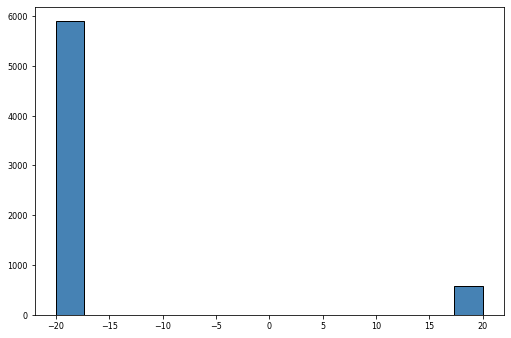

In [247]:
mdf['reward'].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

In [248]:
mdf['room'].count()

6465

In [249]:
room_name_dict

['none', 'Limbo', 'Love', 'Brownhaven', 'Alley', 'Pawn', 'Path', 'Petting']

In [250]:
mdf[mdf['room']=='Petting']['predicted_action_check'].describe()

count     3804
unique       1
top       True
freq      3804
Name: predicted_action_check, dtype: object

In [251]:
mdf[mdf['room']=='Limbo']['predicted_action_check'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: predicted_action_check, dtype: object

In [252]:
mdf[mdf['room']=='Love']['predicted_action_check'].describe()

count      325
unique       1
top       True
freq       325
Name: predicted_action_check, dtype: object

In [253]:
mdf[mdf['room']=='Brownhaven']['predicted_action_check'].describe()

count      313
unique       1
top       True
freq       313
Name: predicted_action_check, dtype: object

In [254]:
mdf[mdf['room']=='Alley']['predicted_action_check'].describe()

count      860
unique       2
top       True
freq       856
Name: predicted_action_check, dtype: object

In [255]:
mdf[mdf['room']=='Pawn']['predicted_action_check'].describe()

count      702
unique       1
top       True
freq       702
Name: predicted_action_check, dtype: object

In [256]:
mdf[mdf['room']=='Path']['predicted_action_check'].describe()

count      461
unique       1
top       True
freq       461
Name: predicted_action_check, dtype: object

In [257]:
mdf[mdf['room']=='Petting']['predicted_action_check'].describe()

count     3804
unique       1
top       True
freq      3804
Name: predicted_action_check, dtype: object

In [ ]:
mdf[mdf['room']=='Petting']['predicted_action_check'].value_counts()

In [261]:
mdf.groupby('predicted_action_check').count()

,room,allowed_exits,action,reward,allowed,predicted_action,action_check,corrected_reward
predicted_action_check,,,,,,,,
False,4,4,4,4,4,4,4,4
True,6461,6461,6461,6461,6461,6461,6461,6461


In [258]:
mdf['predicted_action_check'].describe()

count     6465
unique       2
top       True
freq      6461
Name: predicted_action_check, dtype: object

In [259]:
mdf['room'].describe()

count        6465
unique          6
top       Petting
freq         3804
Name: room, dtype: object

In [260]:
mdf['room'].unique()

array(['Petting', 'Path', 'Brownhaven', 'Love', 'Pawn', 'Alley'],
      dtype=object)

In [294]:
def create3_model():
		# https://towardsdatascience.com/reinforcement-learning-w-keras-openai-dqns-1eed3a5338c
		model = Sequential()
		multiplier = 1
		myinputdim = len(state[0]) * multiplier  # state array includes actions
		myoutputdim = len(actionlist) #+ 1  # outputs are actions, add one extra for unrecognized actions
		#self.actiondict = ['none', 'north', 'east', 'south', 'west']
		print('input dims: ', myinputdim)
		print('output dims: ', myoutputdim)

		model.add(Dense(2*myinputdim, input_dim=myinputdim, activation='relu'))		
		model.add(Dense(18, activation='relu'))        
		model.add(Dense(myoutputdim, activation='linear')) #can try softmax toolearning_rate=.001
		roptimizer = RMSprop(lr=.000001) #.001 worked great
		model.compile(optimizer=roptimizer, loss='mean_squared_error')

		model.summary()
		# Visualize the model
		try:
			plot_model(model, to_file='model.png', show_shapes=True)
		except ImportError as e:
			print('couldnt print model to image', e)
		return model

### Notes 
1. Try playing with model parameters to see if prediction still works
a) try adding that 2nd hidden layer
b) try reducing # of neurons in hidden layer from 24 back down to 12

In [295]:
model = create3_model()
target_model = create3_model()

input dims:  12
output dims:  5
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_88 (Dense)             (None, 18)                450       
_________________________________________________________________
dense_89 (Dense)             (None, 5)                 95        
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________
input dims:  12
output dims:  5
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_91 (Dense)             (None

In [296]:
#retrain model
training_cycles = 5000
for i in np.arange(training_cycles):
    #batch_size = 4
    #samples = random.sample(cmemory, batch_size)
    '''x_values = []
    y_values =[]
    for sample in samples:
        state, action, reward, new_state, done = sample
        target = target_model.predict(state)
        x_values.append(state)
        y_values.append(target)'''
    #x_values = np.vstack(x_values)
    #y_values = np.vstack(y_values)
    replay(cmemory, model, target_model)
    target_train(cmemory, model, target_model)

In [297]:
#redo predictions
mdf['predicted_action']=memorydf.apply(lambda x: 
                                            get_action_from_model(x['state'], model), axis=1)
mdf['predicted_action_check'] = mdf.apply(lambda x: 
                                            check_action(x['allowed_exits'],x['predicted_action']), axis=1)

In [298]:
mdf.sort_values('predicted_action_check',ascending=True)[['allowed_exits','predicted_action','predicted_action_check']].iloc[0:50]

,allowed_exits,predicted_action,predicted_action_check
0,[south],east,False
4319,[south],east,False
4318,[south],east,False
4317,[south],east,False
4316,[south],east,False
4315,[south],east,False
4314,[south],east,False
4313,[south],east,False
4312,[south],east,False
4311,[south],east,False


In [299]:
mdf['predicted_action_check'].sum()/mdf['predicted_action_check'].count()

0.18174787316318639

In [300]:
j=3
j=-1
j

-1